# Project 2

BAC 

Alex Frye, Raquel

In [36]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# tempo switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

And a `System` object to contain the system parameters.

In [37]:
init = State(BAC=0)
init

,value
BAC,0


In [38]:
person = System(init=init,t0=0, t_end=12, 
                gender = .73, 
                weight = 160, 
                drink = 12.5,
                percent = .05)
                
# t_end in hours, gender male, weight lbs, drink (total oz consumed),
#percent - % of alc in drink
person

,value
init,BAC 0 dtype: int64
t0,0
t_end,12
gender,0.73
weight,160
drink,12.5
percent,0.05


Now we can run simulations using the same function from the previous chapter.

In [39]:
drinks = [0.05, 0.12, 0.4, 0.5, 0.95,]
drinks

[0.05, 0.12, 0.4, 0.5, 0.95]

In [40]:
def run_simulation(person):
    unpack(person)
    
    volume = 3
    
    BAC = TimeFrame(columns=init.index)
    BAC.loc[t0] = init
    times = linrange(t0, t_end-t0, .25)
    
    for t in times:
        BAC.loc[t+1] = ((volume*5.14)/(weight*gender)) - 0.015*t
    
    person.results = BAC

In [41]:
run_simulation(person)
person.results


,BAC
0.00,0.000000
1.00,0.132021
1.25,0.128271
1.50,0.124521
1.75,0.120771
2.00,0.117021
2.25,0.113271
2.50,0.109521
2.75,0.105771
3.00,0.102021


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


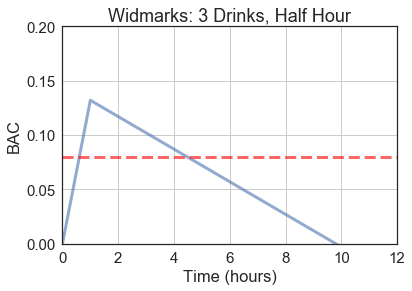

In [45]:
newfig()
plot(person.results.BAC)
plot([t0, t_end], [0.08, 0.08], 'r--')

decorate(xlabel='Time (hours)',title = 'Widmarks: 3 Drinks, Half Hour',
         ylabel='BAC', ylim = [0,0.2],xlim=[0,12])
plt.grid()
